In [32]:
import pandas as pd
import os
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [3]:
path = kagglehub.dataset_download("asaniczka/uk-optimal-product-price-prediction")

# Use the correct file name from the output of os.listdir(path)
file_name = "amz_uk_price_prediction_dataset.csv"
file_path = os.path.join(path, file_name)

df = pd.read_csv(file_path)

df.head()


100%|██████████| 117M/117M [00:01<00:00, 82.0MB/s]

Extracting files...


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


### Here we can see that the top 5 frequency tables are sports and outdoors, beauty, handmade clothing, shoes and accessories followed bz bath & body

In [4]:
freq_table = df["category"].value_counts()
freq_table

,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978
...,...
Alexa Built-In Devices,107
Motorbike Chassis,107
Plugs,107


In [5]:
top_5_freq_tables = freq_table.head(5)
top_5_freq_tables

,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


### Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.

In [6]:
freq_table = df["category"].value_counts()

freq_tables = freq_table.head(10)

freq_tables


,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978
Manicure & Pedicure Products,18940
Skin Care,18769
Make-up,18756
Hair Care,18735


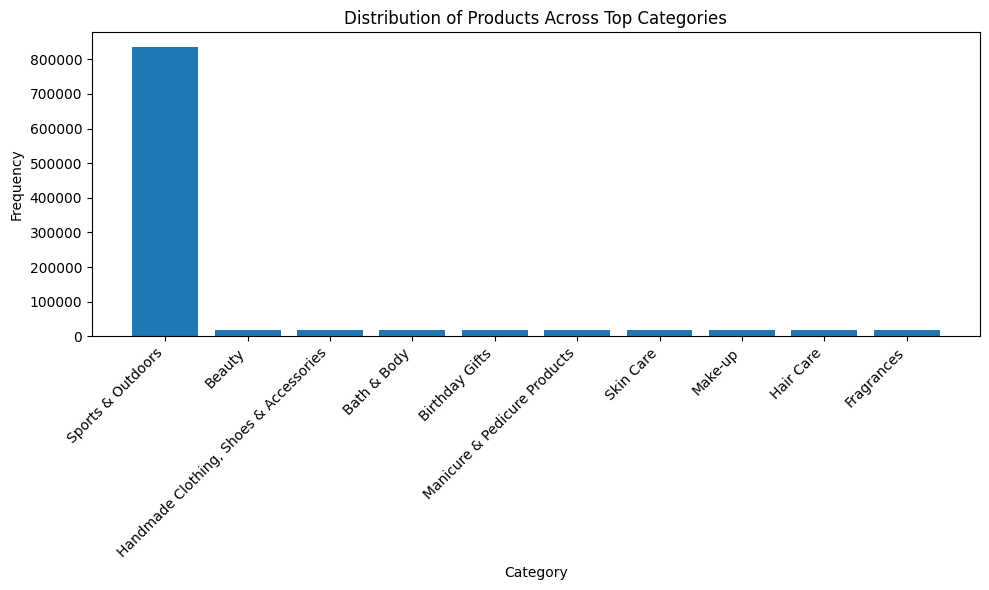

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(freq_tables.index, freq_tables.values)
plt.title('Distribution of Products Across Top Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

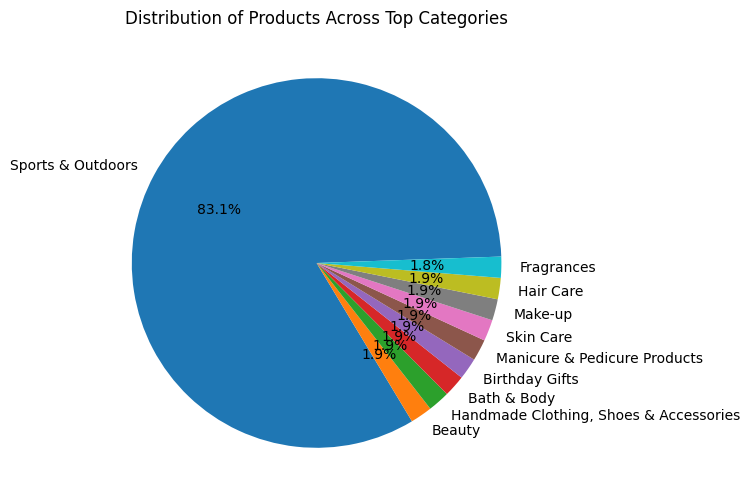

In [8]:
plt.figure(figsize=(10, 6))
plt.pie(freq_tables.values, labels=freq_tables.index, autopct='%1.1f%%', startangle=2)
plt.title('Distribution of Products Across Top Categories')
plt.show()


## Part 2: Delving into Product Pricing

### Measures of Centrality

In [9]:
mean = df["price"].mean()
median = df["price"].median()
mode = df["price"].mode()

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)

Mean: 89.24380943923663
Median: 19.09
Mode: 0    9.99
Name: price, dtype: float64


In [10]:
## Unsure what exactly is meant by "What's the average price point of products listed? How does this compare with the most common price point (mode)?"

### Measures of Dispersion

In [11]:
if "price" in df.columns:
  variance = df["price"].var()
  standard_deviation = df["price"].std()
  price_range = df["price"].max() - df["price"].min()
  q1= df["price"].quantile(0.25)
  q3= df["price"].quantile(0.75)
  iqr = q3 - q1

  print("Price Range:", price_range)
  print("Variance:", variance)
  print("Standard Deviation:", standard_deviation)
  print("Interquartile Range (IQR):", iqr)

Price Range: 100000.0
Variance: 119445.48532256528
Standard Deviation: 345.60886175352226
Interquartile Range (IQR): 36.0


In [12]:
## The range is 10000 meaning there is a very large difference between the highest and lowest price. Here we do not know if this is because of outliers but there is a large range.
## The varriance suggests that the prices are very widely spread around the mean
## A large standard diviation suggest that there is a quite large relative to tzypical price meaning the prices diviate significantly from the mean price
## The IQR compared to the range can mean that the prices are tightly cluttered with large spread occuring due to extreme values (which also proves the price range)

## Visualization

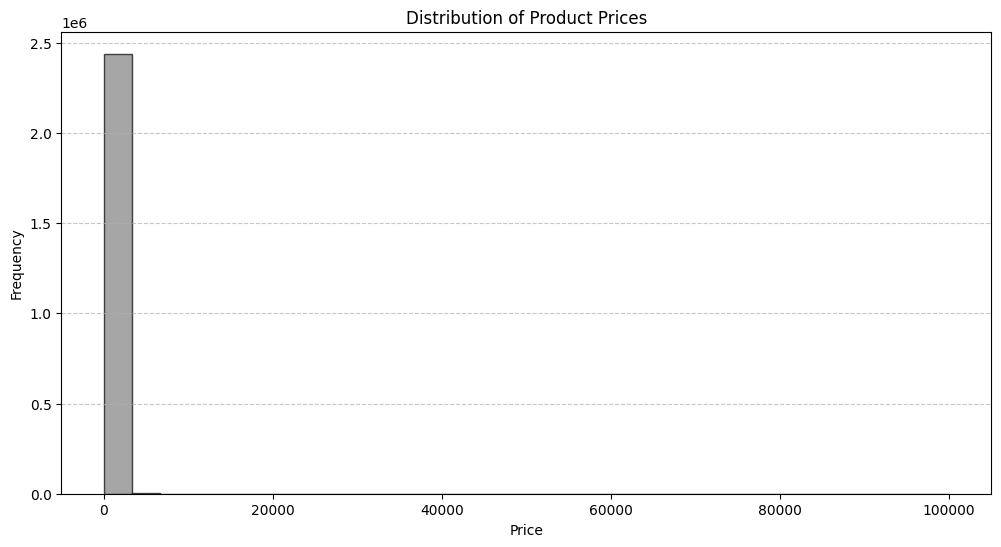

In [16]:
if 'price' in df.columns:
    # Plot histogram
    plt.figure(figsize=(12, 6))
    plt.hist(df['price'], bins=30, color='gray', alpha=0.7, edgecolor='black')
    plt.title('Distribution of Product Prices')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [ ]:
## It is very hard to identify as the columns are very flat (for the data that we cannot see). The data is very heavily skewed with many products having a very high prices. The other prices are vry low and we cannot see.

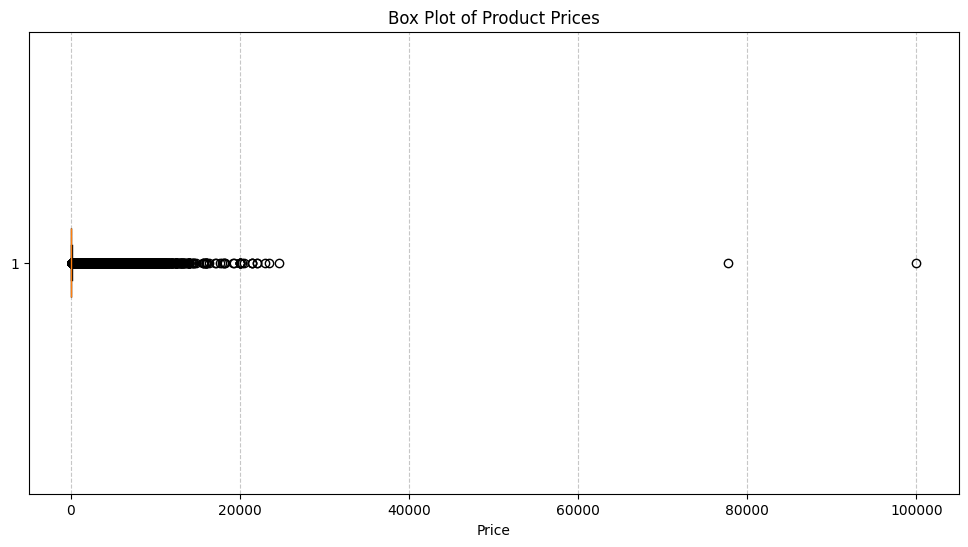

In [17]:
# Box Plot
if 'price' in df.columns:
    plt.figure(figsize=(12, 6))
    plt.boxplot(df['price'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title('Box Plot of Product Prices')
    plt.xlabel('Price')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


In [ ]:
## We can see that there are a few outliers (as ourmeasures of disperstion already showed us). Additionally, there a majority of prices are concentrated around a small range close to the lower end.

In [19]:
outliers = df[df['price'] > 10000]
print(outliers)

             uid        asin  \
49843      54295  B0CBK53WGX   
49845      54297  B0CBK3LBYD   
49846      54298  B0CBK3DGYR   
49851      54303  B0CBK2F1SD   
49859      54311  B0CBK19HGM   
...          ...         ...   
2393205  2760283  B0BM5CKWW1   
2393208  2760286  B0CB6DFRF8   
2393389  2760486  B0C7VM9P3P   
2393393  2760490  B0CJQ5K49B   
2393494  2760599  B0CJXZB9TV   

                                                     title  stars  reviews  \
49843    Electronic Fireplace Decorate Built-in Embedde...    0.0        0   
49845    Electric Fireplace Stand Winter Column Electri...    0.0        0   
49846    Electronic Fireplace Water Vapor Fireplace Ele...    0.0        0   
49851    Electronic Fireplace Decorate Electric Firebox...    0.0        0   
49859    Electric Fireplace Stand Winter Vertical and F...    0.0        0   
...                                                    ...    ...      ...   
2393205  TJLSS Office Chair Comfort Casual Design Offic...    0.0    

## Unlocking Product ratings

In [30]:
mean_stars = df["stars"].mean()
median_stars = df["stars"].median()
mode_stars = df["stars"].mode()

print("Mean:", mean_stars)
print("Median:", median_stars)
print("Mode:", mode_stars)

Mean: 2.152836472966065
Median: 0.0
Mode: 0    0.0
Name: stars, dtype: float64


In [ ]:
#The average rating is 2.15 meaning that is relative low, the meadian and mode are 0 so that could mean either the products are not rated  or there

In [28]:
if "stars" in df.columns:
  variance_stars = df["stars"].var()
  standard_deviation_stars = df["stars"].std()
  stars_range_stars = df["stars"].max() - df["stars"].min()
  q1= df["stars"].quantile(0.25)
  q3= df["stars"].quantile(0.75)
  iqr_stars = q3 - q1

  print("stars Range:", stars_range_stars)
  print("Variance:", variance_stars)
  print("Standard Deviation:", standard_deviation_stars)
  print("Interquartile Range (IQR):", iqr_stars)

stars Range: 5.0
Variance: 4.81743402976196
Standard Deviation: 2.1948653785054697
Interquartile Range (IQR): 4.4


In [ ]:
## What we see is that stars range between 0 and 5, that there is a large variance indicating a broad spread in the rating with the sd giving a large spread

In [33]:
if "stars" in df.columns:
  skewness_stars = df["stars"].skew()
  kurtosis_stars = df["stars"].kurtosis()

  print("Skewness:", skewness_stars)
  print("Kurtosis:", kurtosis_stars)

Skewness: 0.08120735761080985
Kurtosis: -1.9260061280432985


In [ ]:
## The skewness is close to 0 showing that the distrubtion is nearly symetircal, meaning it is rather evenly distributed. the kurtisis is around 2 showing that there are only a few extreme ratings

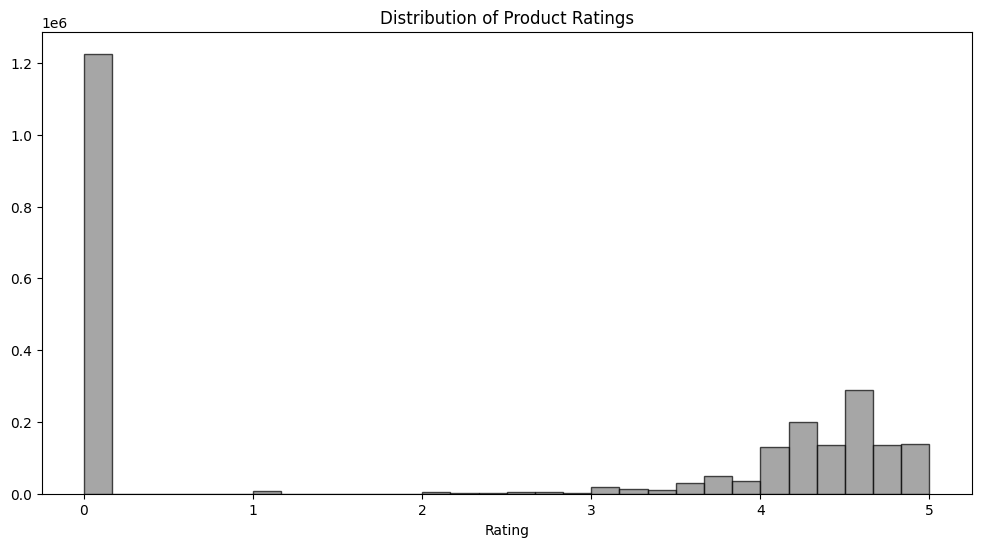

In [34]:
if "stars"  in df.columns:
  plt.figure(figsize=(12, 6))
  plt.hist(df["stars"], bins=30, color="gray", alpha=0.7, edgecolor="black")
  plt.title("Distribution of Product Ratings")
  plt.xlabel("Rating")

In [ ]:
#Most common is the rating of 0 / again possibly meaning that these products where not rated followed by high 4s and 5s.